In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [233]:
np.random.seed(42)
num_samples_per_cluster = 50
mean_cluster1 = [2, 2]
cov_cluster1 = [[1, 0.5], [0.5, 1]] 
cluster1_samples = np.random.multivariate_normal(mean_cluster1, cov_cluster1, num_samples_per_cluster)
mean_cluster2 = [-2, -2]
cov_cluster2 = [[1, -0.5], [-0.5, 1]] 
cluster2_samples = np.random.multivariate_normal(mean_cluster2, cov_cluster2, num_samples_per_cluster)
X = np.vstack([cluster1_samples, cluster2_samples])

np.random.shuffle(X)

print(X, X.shape)

[[-2.44625026 -1.62657865]
 [ 2.88138988  2.57217751]
 [-0.35155232 -3.67496155]
 [ 2.50780655  2.32214757]
 [-0.76235861 -2.45055679]
 [ 1.89807704  0.67723339]
 [-2.26026814 -1.81417778]
 [-1.29495447 -2.47279184]
 [ 0.84359908  0.61782278]
 [ 3.49252377  2.08022007]
 [ 2.31985125  2.08571429]
 [-1.82602964 -1.34678711]
 [ 2.77182689  2.44416474]
 [-1.15769445 -2.68858044]
 [-2.16435574 -2.58938042]
 [-2.62791774 -0.95930134]
 [ 2.2803935   2.89206979]
 [-3.31995873 -1.91090558]
 [-1.63756305 -3.17824724]
 [-1.65829705 -1.9376521 ]
 [ 2.01168515  2.36879772]
 [-0.42878805 -2.02127754]
 [-2.62189538 -2.52107492]
 [-1.42531924 -3.14097849]
 [-1.76352849 -0.33967853]
 [ 1.63896508  1.50070077]
 [ 1.43160588  2.40025087]
 [ 2.65389295  1.22914477]
 [-1.18510731 -1.95849389]
 [ 3.64035971  2.9205155 ]
 [-0.84322178 -2.68318579]
 [ 1.27478504  1.44615332]
 [ 1.56059615  2.56412904]
 [-2.9704226  -1.88673496]
 [ 0.64148816  1.57276828]
 [ 3.85781456  4.67971706]
 [-1.95732039 -1.65736223]
 

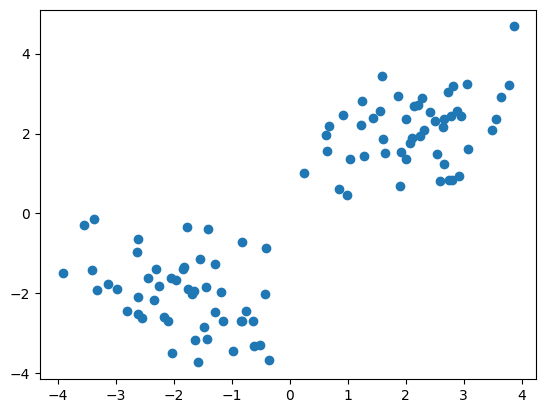

In [234]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [235]:
def generate_centroids(X, k):
    centroids = np.zeros((k,X.shape[1]))

    for centroid in range(k):
        rand_index = random.randint(0, X.shape[0] - 1)
        new_centroid = X[rand_index]

        if new_centroid in centroids:
            centroid - 1
            continue
        else: centroids[centroid] = new_centroid

    return centroids


def compute_distance(x, centroid):
    return np.sum(np.abs(x - centroid))


def calc_distortion(X, centroids, points):
    summ = 0
    m = X.shape[0]

    for ci, centroid in enumerate(centroids):
        centroid_points = points[ci]
        summ += np.sum(np.abs(np.array(centroid_points) - centroid))

    return summ / m


def perform_kmeans(X, iterations=100, k=2):
    centroids = generate_centroids(X, k)

    for i in range(iterations):
        points = [[], []]
        
        for sample in X:
            distances = [compute_distance(sample, centroid) for centroid in centroids]
            ci = np.argmin(distances)
            chosen_centroid = centroids[ci]
            points[ci].append(sample)
        
        for ci in range(k):
            new_centroids = np.zeros((k,2))
            new_centroids[ci] = np.mean(points[ci])
        
        if np.array_equal(new_centroids, centroids): break
        else:
            centroids = new_centroids

    print(f"Distortion: {calc_distortion(X, centroids, points)}")
    return points

Distortion: 2.5813128153799867


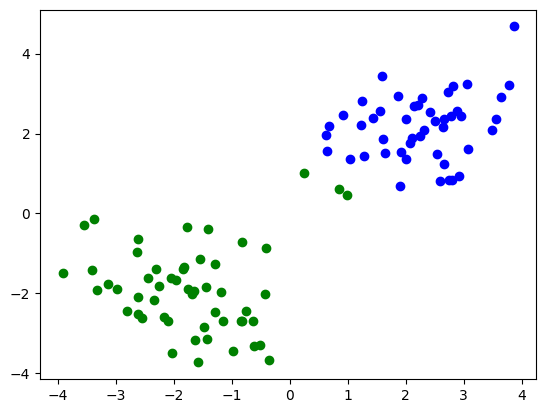

In [244]:
points = perform_kmeans(X, iterations=4000)

plt.scatter([point[0] for point in points[0]], [point[1] for point in points[0]], c='green')
plt.scatter([point[0] for point in points[1]], [point[1] for point in points[1]], c='blue')
plt.show()